# Exploratory Data Analysis

In [56]:
import pandas as pd 

In [57]:
data=pd.read_csv('sensor_readings_2.csv')
data.head()

,1.687,0.445,Slight-Right-Turn
0,1.687,0.449,Slight-Right-Turn
1,1.687,0.449,Slight-Right-Turn
2,1.687,0.449,Slight-Right-Turn
3,1.687,0.449,Slight-Right-Turn
4,1.686,0.446,Slight-Right-Turn


In [58]:
#ADD COULMN NAMES
data.columns=['sensor_00','sensor_01','RESULT']
data.head()
#distinct values in the column 'RESULT' and store them in a variable called 'distinct_values'
distinct_values=data['RESULT'].unique()

distinct_values


array(['Slight-Right-Turn', 'Sharp-Right-Turn', 'Move-Forward',
       'Slight-Left-Turn'], dtype=object)

In [59]:
data.isnull().sum() #CHECK FOR MISSING VALUES

sensor_00    0
sensor_01    0
RESULT       0
dtype: int64

In [60]:
data.dropna(inplace=True) #REMOVE MISSING VALUES

In [61]:
# data properties
data.describe()


,sensor_00,sensor_01
count,5455.000000,5455.000000
mean,1.290234,0.681313
std,0.626734,0.342611
min,0.495000,0.340000
25%,0.826000,0.495000
50%,1.089000,0.612000
75%,1.518500,0.753000
max,5.000000,5.000000


In [62]:
data.head()

,sensor_00,sensor_01,RESULT
0,1.687,0.449,Slight-Right-Turn
1,1.687,0.449,Slight-Right-Turn
2,1.687,0.449,Slight-Right-Turn
3,1.687,0.449,Slight-Right-Turn
4,1.686,0.446,Slight-Right-Turn


In [63]:
#check result has how much distinct results
data['RESULT'].value_counts()

RESULT
Move-Forward         2205
Sharp-Right-Turn     2097
Slight-Right-Turn     825
Slight-Left-Turn      328
Name: count, dtype: int64

In [64]:
#check the how much value and print other column of result has this outcome Slight-Left-Turn
data[data['RESULT']=='Slight-Left-Turn']


,sensor_00,sensor_01,RESULT
761,2.011,3.134,Slight-Left-Turn
765,1.960,1.434,Slight-Left-Turn
766,1.945,1.426,Slight-Left-Turn
767,1.930,1.422,Slight-Left-Turn
768,1.914,1.415,Slight-Left-Turn
...,...,...,...
5355,0.961,0.935,Slight-Left-Turn
5356,0.946,0.935,Slight-Left-Turn
5357,0.935,0.937,Slight-Left-Turn
5358,0.922,0.939,Slight-Left-Turn


In [65]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['RESULT']=le.fit_transform(data['RESULT'])
data.head()


,sensor_00,sensor_01,RESULT
0,1.687,0.449,3
1,1.687,0.449,3
2,1.687,0.449,3
3,1.687,0.449,3
4,1.686,0.446,3


In [66]:
data

,sensor_00,sensor_01,RESULT
0,1.687,0.449,3
1,1.687,0.449,3
2,1.687,0.449,3
3,1.687,0.449,3
4,1.686,0.446,3
...,...,...,...
5450,1.024,0.657,0
5451,0.894,0.649,1
5452,0.873,0.642,1
5453,0.967,0.635,0


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix


In [68]:
x=data.drop('RESULT',axis=1)
y=data['RESULT']

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=100)
model=RandomForestClassifier(n_estimators=100)

In [70]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
modelpred=model.predict(x_test)

In [72]:
accuracy_score(y_test,modelpred)

1.0

[[1099    0    0    0]
 [   0 1060    0    0]
 [   0    0  160    0]
 [   0    0    0  409]]


<Axes: >

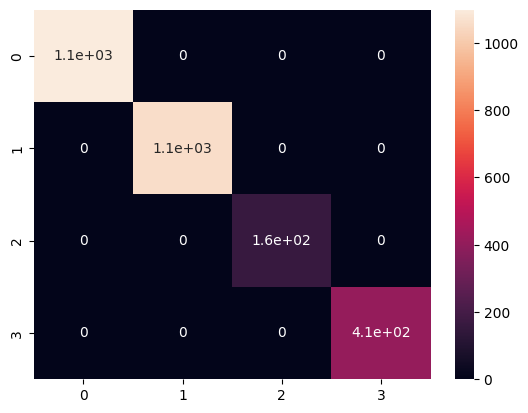

In [73]:
#f1 score,confusion matrix using seaborn
f1_score(y_test,modelpred,average='weighted')
print(confusion_matrix(y_test,modelpred))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,modelpred),annot=True)



In [74]:
#take random value of sensor_00,sensor_01 and predict the result
print(distinct_values[model.predict([[3,3]])])


['Move-Forward']


c:\Users\Bakra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [75]:
#using grid search cv to find best parameters and best model
from sklearn.model_selection import GridSearchCV
#linear regression,logistic regression,random forest,decision tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_params={
    'linear_regression':{
        'model':LinearRegression(),
        'params':{
            
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,5,10]
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10,100]
        }
    }
}
#grid search cv
scores=[]
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df




,model,best_score,best_params
0,linear_regression,-0.026115,{}
1,logistic_regression,0.954537,{'C': 10}
2,decision_tree,0.999633,{'criterion': 'gini'}
3,random_forest,1.000000,{'n_estimators': 5}


# sensor with 4 reading 

In [76]:
df=pd.read_csv('sensor_readings_4.csv')
df

,1.687,0.445,2.332,0.429,Slight-Right-Turn
0,1.687,0.449,2.332,0.429,Slight-Right-Turn
1,1.687,0.449,2.334,0.429,Slight-Right-Turn
2,1.687,0.449,2.334,0.429,Slight-Right-Turn
3,1.687,0.449,2.334,0.429,Slight-Right-Turn
4,1.686,0.446,2.334,0.430,Slight-Right-Turn
...,...,...,...,...,...
5450,1.024,0.657,1.087,1.562,Move-Forward
5451,0.894,0.649,1.071,1.085,Sharp-Right-Turn
5452,0.873,0.642,1.053,1.105,Sharp-Right-Turn
5453,0.967,0.635,1.034,1.118,Move-Forward


In [77]:
df.columns=['sensor_00','sensor_01','sensor_02','sensor_03','RESULT']

In [78]:
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,RESULT
0,1.687,0.449,2.332,0.429,Slight-Right-Turn
1,1.687,0.449,2.334,0.429,Slight-Right-Turn
2,1.687,0.449,2.334,0.429,Slight-Right-Turn
3,1.687,0.449,2.334,0.429,Slight-Right-Turn
4,1.686,0.446,2.334,0.430,Slight-Right-Turn


In [79]:
df['RESULT']=le.fit_transform(df['RESULT'])
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,RESULT
0,1.687,0.449,2.332,0.429,3
1,1.687,0.449,2.334,0.429,3
2,1.687,0.449,2.334,0.429,3
3,1.687,0.449,2.334,0.429,3
4,1.686,0.446,2.334,0.430,3


In [80]:
x=df.drop('RESULT',axis=1)
y=df['RESULT']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=100)
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
modelpred=model.predict(x_test)
accuracy_score(y_test,modelpred)


0.999633431085044

[[1099    0    0    0]
 [   0 1060    0    0]
 [   0    0  160    0]
 [   0    1    0  408]]


c:\Users\Bakra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['Move-Forward']


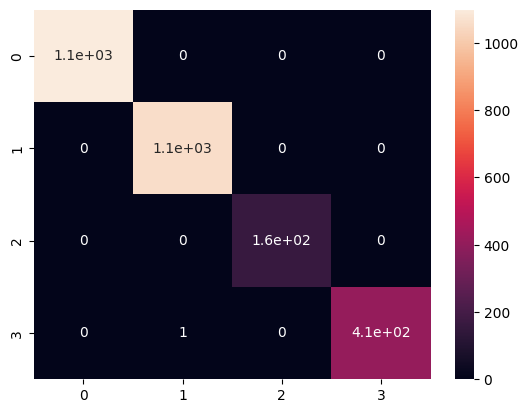

In [81]:
f1_score(y_test,modelpred,average='weighted')
print(confusion_matrix(y_test,modelpred))
sns.heatmap(confusion_matrix(y_test,modelpred),annot=True)

print(distinct_values[model.predict([[3,3,3,3]])])

# 24 Sensor Data

In [82]:
dt=pd.read_csv('sensor_readings_24.csv')
dt.head()

,0.438,0.498,3.625,3.645,5.000,2.918,5.000.1,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
0,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
2,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
3,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
4,0.439,0.498,3.626,3.629,5.0,2.918,5.0,2.633,2.334,2.645,...,0.589,0.502,0.493,0.504,0.446,0.431,0.444,0.444,0.430,Slight-Right-Turn


In [83]:
dt.isna().sum()
dt.columns=['sensor_00','sensor_01','sensor_02','sensor_03','sensor_04','sensor_05','sensor_06','sensor_07','sensor_08','sensor_09','sensor_10','sensor_11','sensor_12','sensor_13','sensor_14','sensor_15','sensor_16','sensor_17','sensor_18','sensor_19','sensor_20','sensor_21','sensor_22','sensor_23','RESULT']
dt

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,RESULT
0,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
2,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
3,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
4,0.439,0.498,3.626,3.629,5.000,2.918,5.000,2.633,2.334,2.645,...,0.589,0.502,0.493,0.504,0.446,0.431,0.444,0.444,0.430,Slight-Right-Turn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5450,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,Move-Forward
5451,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,Sharp-Right-Turn
5452,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,Sharp-Right-Turn
5453,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,Move-Forward


In [ ]:
dt['RESULT']=le.fit_transform(dt['RESULT'])
dt.head()
x=dt.drop('RESULT',axis=1)
y=dt['RESULT']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=200)
model=RandomForestClassifier()
model.fit(x_train,y_train)
modelpred=model.predict(x_test)
print(accuracy_score(y_test,modelpred))
#save the model
import pickle
pickle.dump(model,open('model.pkl','wb'))
#load the model
model=pickle.load(open('model.pkl','rb'))
import numpy as np
model.predict(np.random.rand(1, 24) * 2)  # No warning if trained without feature names




0.9919354838709677


c:\Users\Bakra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

<Axes: >

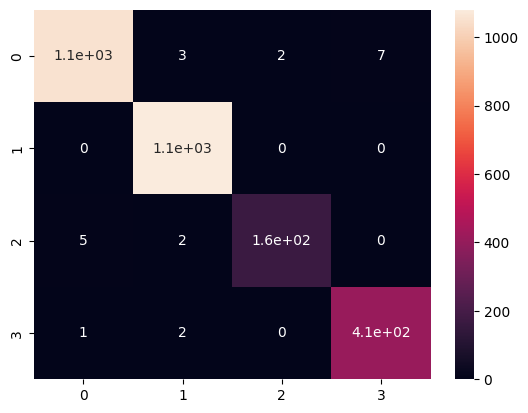

In [89]:
confusion_matrix(y_test,modelpred)
sns.heatmap(confusion_matrix(y_test,modelpred),annot=True)


In [85]:
#grip search cv
scores=[]
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\Bakra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Bakra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

,model,best_score,best_params
0,linear_regression,0.114216,{}
1,logistic_regression,0.675527,{'C': 10}
2,decision_tree,0.985335,{'criterion': 'entropy'}
3,random_forest,0.988818,{'n_estimators': 100}


In [86]:
# overcome error TOTAL NO. OF ITERATIONS REACHED LIMIT.
model_params={
   
    'logistic_regression':{
        'model':LogisticRegression(max_iter=1000),
        'params':{
            'C':[1,5,10]
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(max_leaf_nodes=100),
        'params':{
            'criterion':['gini','entropy']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(max_leaf_nodes=100),
        'params':{
            'n_estimators':[1,5,10,100]
        }
    }
}

In [96]:
import numpy as np
import pygame
import random
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load your trained model (assuming you've saved it)
model=pickle.load(open('model.pkl','rb'))

# Initialize pygame
pygame.init()

# Define colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)

# Screen settings
GRID_SIZE = 10
CELL_SIZE = 50
WIDTH = GRID_SIZE * CELL_SIZE
HEIGHT = GRID_SIZE * CELL_SIZE

screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Robot Maze Simulation")

# Define the maze (1 = wall, 0 = free path)
maze = np.zeros((GRID_SIZE, GRID_SIZE))
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        if random.random() < 0.2:  # 20% chance of being a wall
            maze[i][j] = 1

# Ensure start (0,0) and end (9,9) are free
maze[0][0] = 0
maze[GRID_SIZE - 1][GRID_SIZE - 1] = 0

# Robot position
robot_x, robot_y = 0, 0

def move_robot():
    global robot_x, robot_y

    # Generate fake sensor data (replace with real input)
    sensor_data = np.random.rand(1, 24) * 5  # Simulating 24 sensor values
    # Define column names (same as used during training)
    feature_names = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 
                 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 
                 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 
                 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23']

    # Convert NumPy array to Pandas DataFrame with column names
    sensor_df = pd.DataFrame(sensor_data, columns=feature_names)

    # Predict movement using ML model
    action = model.predict(sensor_df)[0]

    # Movement Logic
    if action == 2:  # Move Forward
        if robot_x + 1 < GRID_SIZE and maze[robot_x + 1][robot_y] == 0:
            robot_x += 1  

    elif action == 0:  # Slight Right Turn (Move diagonally)
        if robot_x + 1 < GRID_SIZE and robot_y + 1 < GRID_SIZE and maze[robot_x + 1][robot_y + 1] == 0:
            robot_x += 1
            robot_y += 1  

    elif action == 1:  # Sharp Right Turn (Move more to the right)
        if robot_y + 1 < GRID_SIZE and maze[robot_x][robot_y + 1] == 0:
            robot_y += 1  

    elif action == 3:  # Slight Left Turn (Move diagonally left)
        if robot_x + 1 < GRID_SIZE and robot_y - 1 >= 0 and maze[robot_x + 1][robot_y - 1] == 0:
            robot_x += 1
            robot_y -= 1  


# Game loop
running = True
while running:
    screen.fill(WHITE)

    # Draw maze
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            color = WHITE
            if maze[i][j] == 1:
                color = RED  # Walls
            pygame.draw.rect(screen, color, (j * CELL_SIZE, i * CELL_SIZE, CELL_SIZE, CELL_SIZE))

    # Draw robot
    pygame.draw.circle(screen, BLUE, (robot_y * CELL_SIZE + CELL_SIZE // 2, robot_x * CELL_SIZE + CELL_SIZE // 2), CELL_SIZE // 3)

    # Move robot
    move_robot()

    pygame.display.flip()
    pygame.time.delay(500)  # Pause for movement speed

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

pygame.quit()




In [94]:
sensor_data = np.random.rand(1, 24) * 5  # Simulating 24 sensor values
action = model.predict(sensor_data)[0]
action

c:\Users\Bakra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


np.int64(1)